In [13]:
import numpy as np
import pandas as pd

In [14]:
df1=pd.read_csv("Food_Delivery_Times.csv")

In [15]:
df1.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [17]:
# four attributes have objects (weather, traafic_level, Time_of_Day, Vehical_type)
#four attribute has null values (weather, traafic_level, Time_of_Day, Courier_Experience_yrs) 

In [18]:
df1['Traffic_Level'].value_counts()

Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

In [19]:
df1['Time_of_Day'].value_counts()

Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

In [20]:
df1['Vehicle_Type'].value_counts()

Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64

In [21]:
df1.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [22]:
import matplotlib.pyplot as plt

In [23]:
#Creating a test set

In [24]:
df1['Order_ID'].nunique()

1000

In [25]:
def remove_outlier(X):
    if isinstance(X, pd.DataFrame):  # Convert DataFrame to NumPy array
        X = X.values  

    Q1 = np.percentile(X, 25, axis=0)  # Compute 25th percentile (Q1)
    Q3 = np.percentile(X, 75, axis=0)  # Compute 75th percentile (Q3)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return np.clip(X, lower_bound, upper_bound)

# Select numerical columns only for outlier removal
num_cols = df1.select_dtypes(include=[np.number]).columns
df1[num_cols] = remove_outlier(df1[num_cols])

In [26]:
from zlib import crc32
def is_data_in_test (identifier, test_ratio):
    return crc32(np.int64(identifier))<test_ratio*2**32

In [27]:
def split_data (data, test_ratio, id_column):
    ids=data[id_column]
    in_test_set=ids.apply(lambda x:is_data_in_test(x,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [28]:
df1['Order_ID'].nunique()

1000

In [29]:
train_set, test_set = split_data(df1,0.2,"Order_ID")

In [30]:
df1.drop(['Order_ID','Courier_Experience_yrs'], axis=1)

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12.0,43.0
1,16.42,Clear,Medium,Evening,Bike,20.0,84.0
2,9.52,Foggy,Low,Night,Scooter,28.0,59.0
3,7.44,Rainy,Medium,Afternoon,Scooter,5.0,37.0
4,19.03,Clear,Low,Morning,Bike,16.0,68.0
...,...,...,...,...,...,...,...
995,8.50,Clear,High,Evening,Car,13.0,54.0
996,16.28,Rainy,Low,Morning,Scooter,8.0,71.0
997,15.62,Snowy,High,Evening,Scooter,26.0,81.0
998,14.17,Clear,Low,Afternoon,Bike,8.0,55.0


In [31]:
len(train_set), len(test_set)

(799, 201)

In [32]:
df=train_set

In [33]:
import seaborn as sns

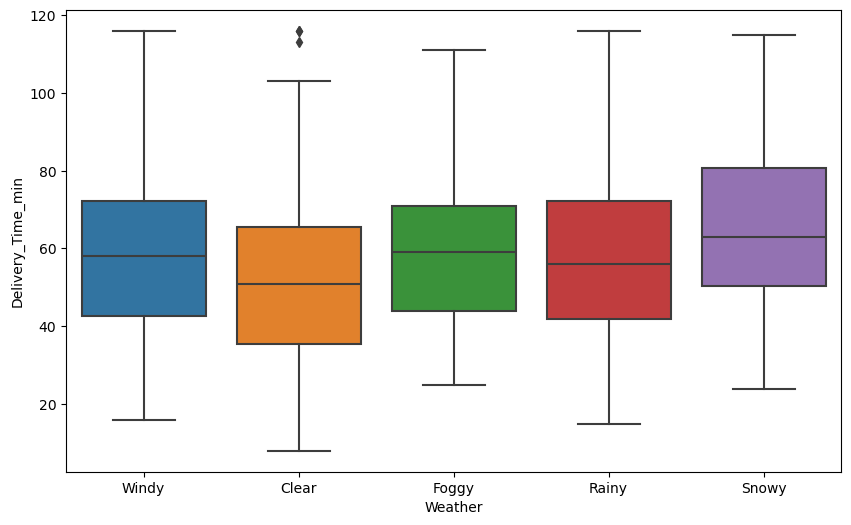

In [34]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Delivery_Time_min', data=df)
plt.show()

In [35]:
corr_matrix=df.corr(numeric_only=True)

<Axes: >

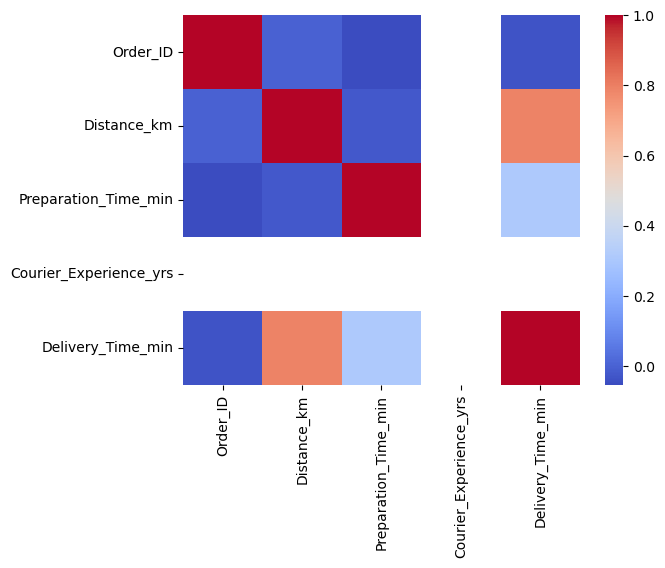

In [36]:
sns.heatmap(corr_matrix, cmap='coolwarm')


In [37]:
corr_matrix

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Order_ID,1.000000,-0.004306,-0.053892,NaN,-0.034622
Distance_km,-0.004306,1.000000,-0.021272,NaN,0.792893
Preparation_Time_min,-0.053892,-0.021272,1.000000,NaN,0.311902
Courier_Experience_yrs,NaN,NaN,NaN,NaN,NaN
Delivery_Time_min,-0.034622,0.792893,0.311902,NaN,1.000000


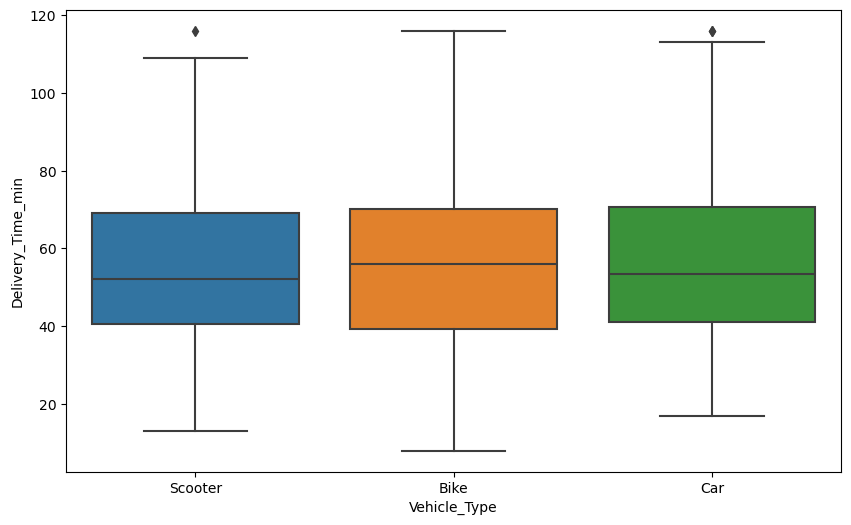

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Vehicle_Type', y='Delivery_Time_min', data=df)
plt.show()

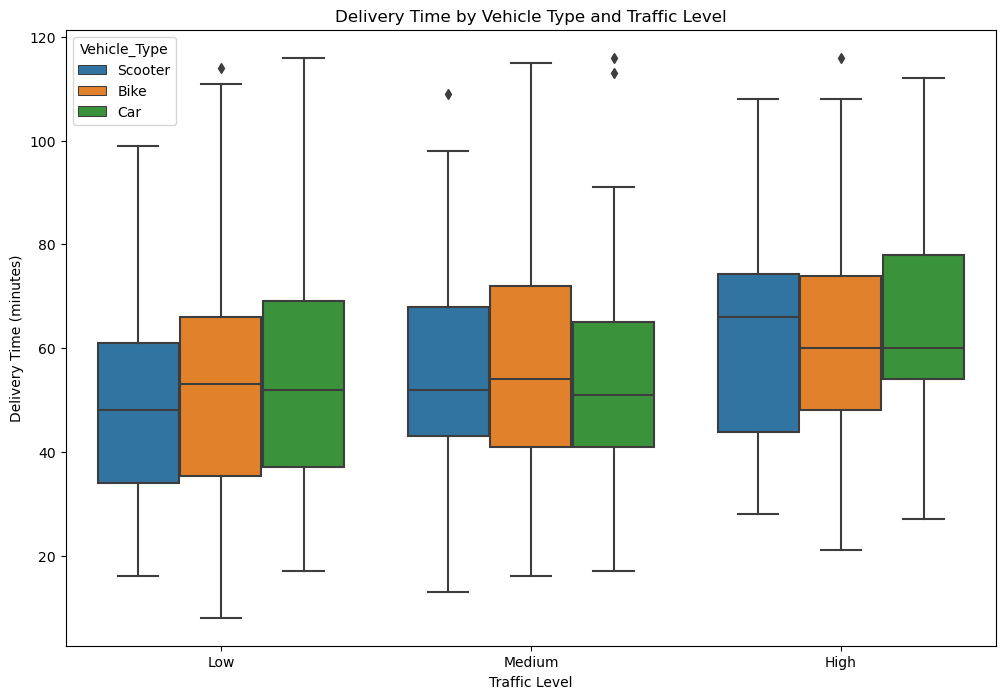

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame called 'df' with columns 'Vehicle_Type', 'Traffic_Level', and 'Delivery_Time_min'
plt.figure(figsize=(12,8))

# Create a box plot: Show distribution of delivery times by vehicle type and traffic level
sns.boxplot(x='Traffic_Level', y='Delivery_Time_min', hue='Vehicle_Type', data=df)

# Set plot title and labels
plt.title('Delivery Time by Vehicle Type and Traffic Level')
plt.xlabel('Traffic Level')
plt.ylabel('Delivery Time (minutes)')

# Show the plot
plt.show()

In [40]:
df['delivery_speed']=df['Distance_km']/df['Delivery_Time_min']

/var/folders/77/58cswsf121l0qymv21qbtb500000gn/T/ipykernel_70486/1986804922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delivery_speed']=df['Distance_km']/df['Delivery_Time_min']


In [41]:
corr_matrix1=df.corr(numeric_only=True)

In [42]:
corr_matrix1

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,delivery_speed
Order_ID,1.000000,-0.004306,-0.053892,NaN,-0.034622,0.039697
Distance_km,-0.004306,1.000000,-0.021272,NaN,0.792893,0.792398
Preparation_Time_min,-0.053892,-0.021272,1.000000,NaN,0.311902,-0.344215
Courier_Experience_yrs,NaN,NaN,NaN,NaN,NaN,NaN
Delivery_Time_min,-0.034622,0.792893,0.311902,NaN,1.000000,0.312735
delivery_speed,0.039697,0.792398,-0.344215,NaN,0.312735,1.000000


In [43]:
corr_matrix

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Order_ID,1.000000,-0.004306,-0.053892,NaN,-0.034622
Distance_km,-0.004306,1.000000,-0.021272,NaN,0.792893
Preparation_Time_min,-0.053892,-0.021272,1.000000,NaN,0.311902
Courier_Experience_yrs,NaN,NaN,NaN,NaN,NaN
Delivery_Time_min,-0.034622,0.792893,0.311902,NaN,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

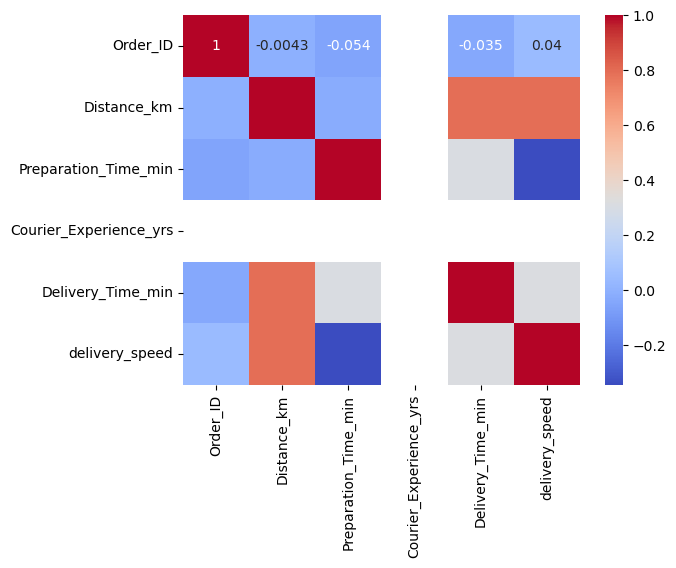

In [44]:
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

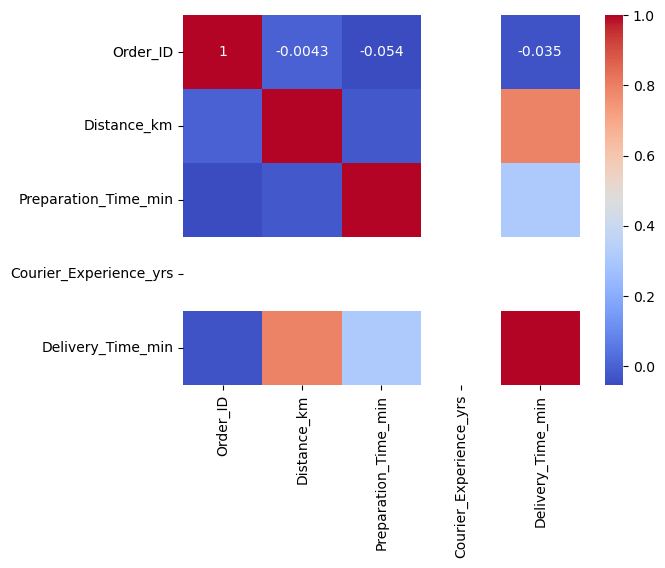

In [45]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [46]:
df.head(10)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,delivery_speed
0,522.0,7.93,Windy,Low,Afternoon,Scooter,12.0,NaN,43.0,0.184419
1,738.0,16.42,Clear,Medium,Evening,Bike,20.0,NaN,84.0,0.195476
2,741.0,9.52,Foggy,Low,Night,Scooter,28.0,NaN,59.0,0.161356
3,661.0,7.44,Rainy,Medium,Afternoon,Scooter,5.0,NaN,37.0,0.201081
4,412.0,19.03,Clear,Low,Morning,Bike,16.0,NaN,68.0,0.279853
5,679.0,19.40,Clear,Low,Evening,Scooter,8.0,NaN,57.0,0.340351
6,627.0,9.52,Clear,Low,NaN,Bike,12.0,NaN,49.0,0.194286
7,514.0,17.39,Clear,Medium,Evening,Scooter,5.0,NaN,46.0,0.378043
8,860.0,1.78,Snowy,Low,Evening,Car,20.0,NaN,35.0,0.050857
10,812.0,16.86,Snowy,Medium,Afternoon,Car,13.0,NaN,88.0,0.191591


<Axes: xlabel='delivery_speed', ylabel='Distance_km'>

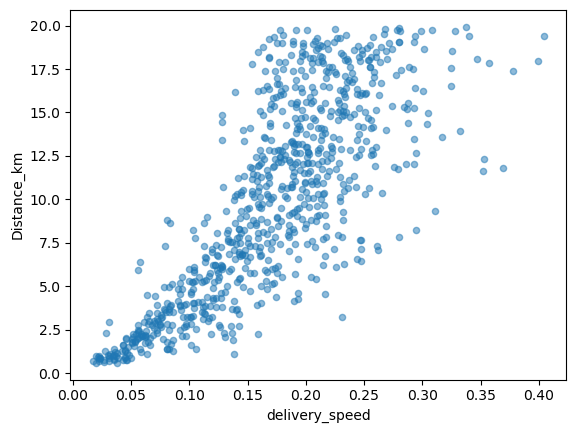

In [47]:
df.plot(kind='scatter', x='delivery_speed', y='Distance_km',alpha=0.5)

<Axes: xlabel='Delivery_Time_min', ylabel='Distance_km'>

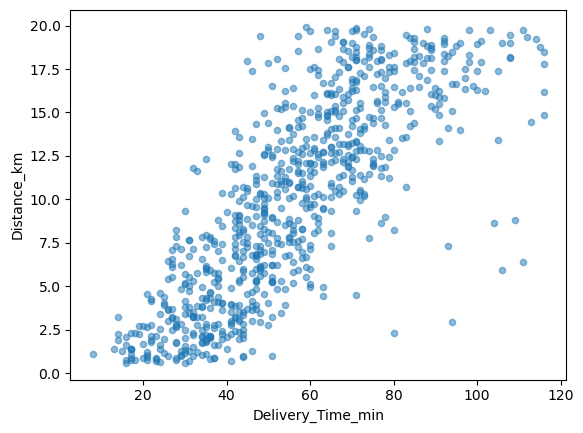

In [48]:
df.plot(kind='scatter', x='Delivery_Time_min', y='Distance_km', alpha=0.5)

<Axes: xlabel='delivery_speed', ylabel='Distance_km'>

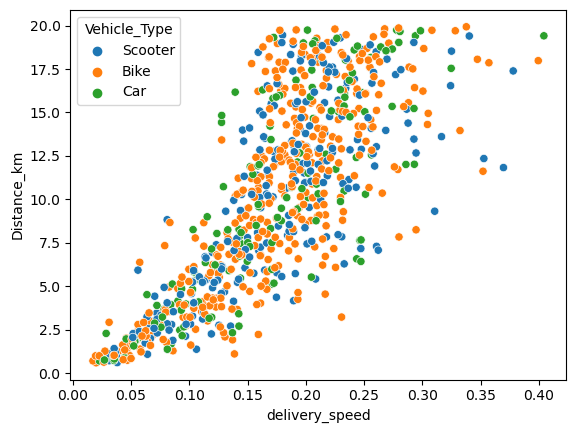

In [49]:
sns.scatterplot(data=df, x='delivery_speed', y='Distance_km', hue='Vehicle_Type')


In [50]:
df.head()


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,delivery_speed
0,522.0,7.93,Windy,Low,Afternoon,Scooter,12.0,NaN,43.0,0.184419
1,738.0,16.42,Clear,Medium,Evening,Bike,20.0,NaN,84.0,0.195476
2,741.0,9.52,Foggy,Low,Night,Scooter,28.0,NaN,59.0,0.161356
3,661.0,7.44,Rainy,Medium,Afternoon,Scooter,5.0,NaN,37.0,0.201081
4,412.0,19.03,Clear,Low,Morning,Bike,16.0,NaN,68.0,0.279853


<Axes: xlabel='Distance_km', ylabel='delivery_speed'>

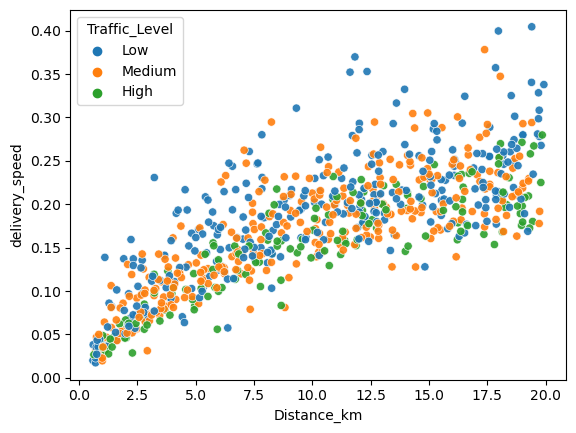

In [51]:
sns.scatterplot(data=df, y='delivery_speed', x='Distance_km', hue='Traffic_Level', alpha=0.9)

<Axes: xlabel='Distance_km', ylabel='delivery_speed'>

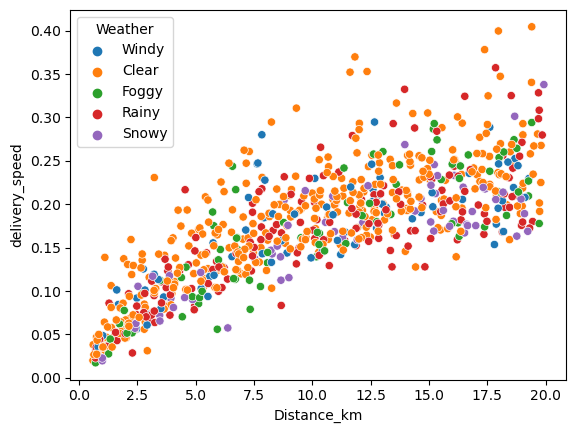

In [52]:
sns.scatterplot(data=df, y='delivery_speed', x='Distance_km', hue='Weather')

<Axes: xlabel='Distance_km', ylabel='delivery_speed'>

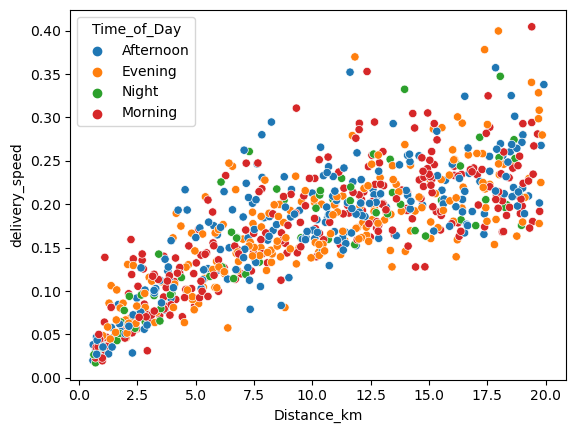

In [53]:
sns.scatterplot(data=df, y='delivery_speed', x='Distance_km', hue='Time_of_Day')

<function matplotlib.pyplot.show(close=None, block=None)>

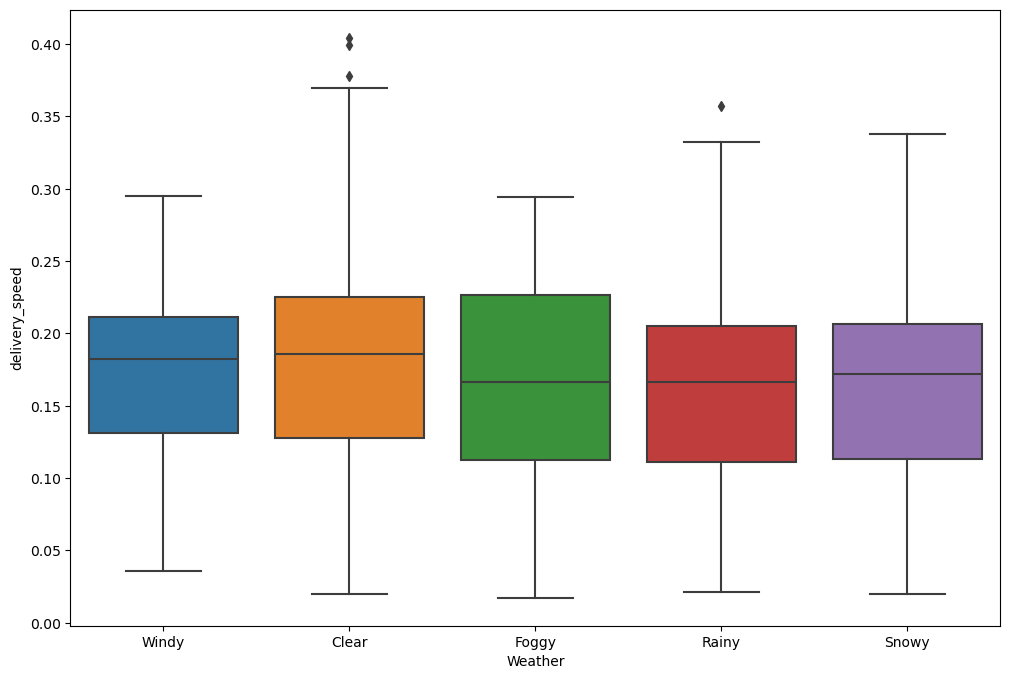

In [54]:
plt.figure(figsize=(12,8))
sns.boxplot(df, x='Weather',y='delivery_speed')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

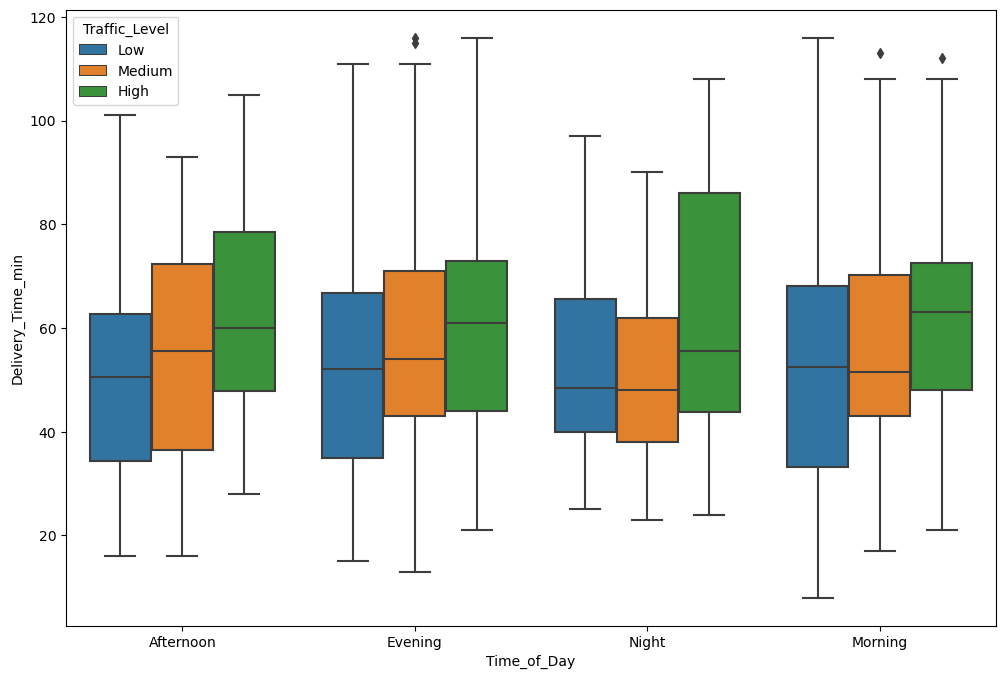

In [55]:
plt.figure(figsize=(12,8))
sns.boxplot(df, x='Time_of_Day',y='Delivery_Time_min', hue='Traffic_Level')
plt.show

<Axes: xlabel='Distance_km', ylabel='delivery_speed'>

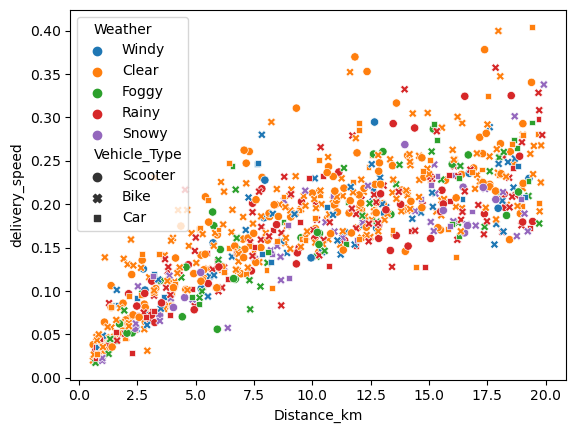

In [56]:
sns.scatterplot(data=df, x='Distance_km', y='delivery_speed', hue='Weather', style='Vehicle_Type')

<Axes: >

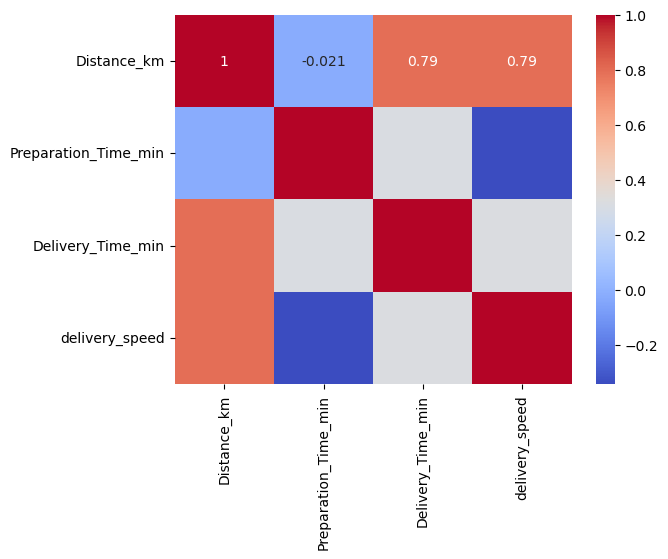

In [57]:
corr_matrix = df[['Distance_km', 'Preparation_Time_min', 'Delivery_Time_min', 'delivery_speed']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: xlabel='Traffic_Level', ylabel='Weather'>

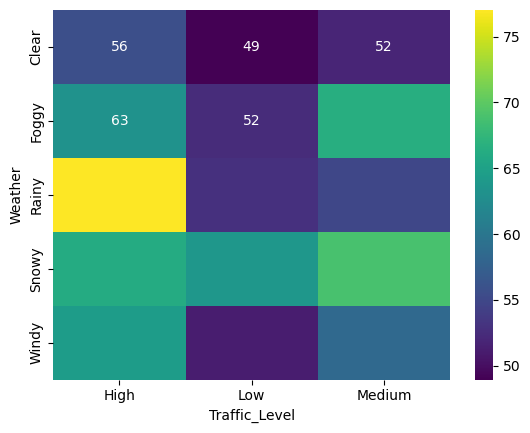

In [58]:
pivot_table = df.pivot_table(values='Delivery_Time_min', index='Weather', columns='Traffic_Level')
sns.heatmap(pivot_table, annot=True, cmap='viridis')

<Axes: xlabel='Traffic_Level', ylabel='Weather'>

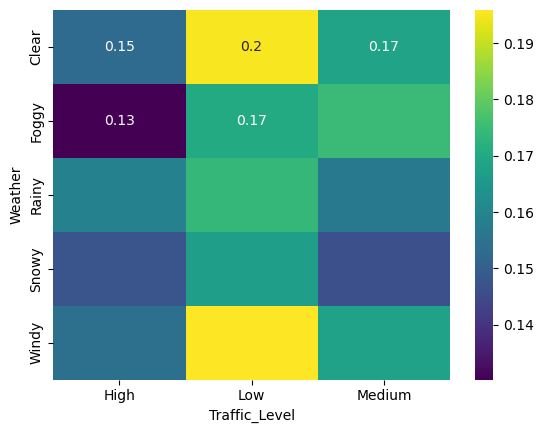

In [59]:
pivot_table = df.pivot_table(values='delivery_speed', index='Weather', columns='Traffic_Level')
sns.heatmap(pivot_table, annot=True, cmap='viridis')

<Axes: xlabel='Weather', ylabel='delivery_speed'>

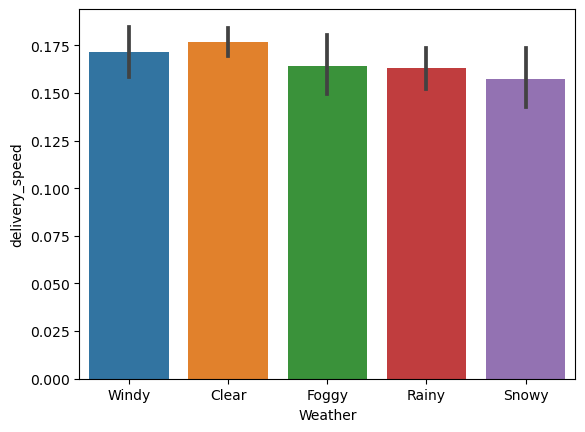

In [60]:
sns.barplot(data=df, x='Weather', y='delivery_speed', estimator=np.mean)

<Axes: xlabel='Traffic_Level', ylabel='Preparation_Time_min'>

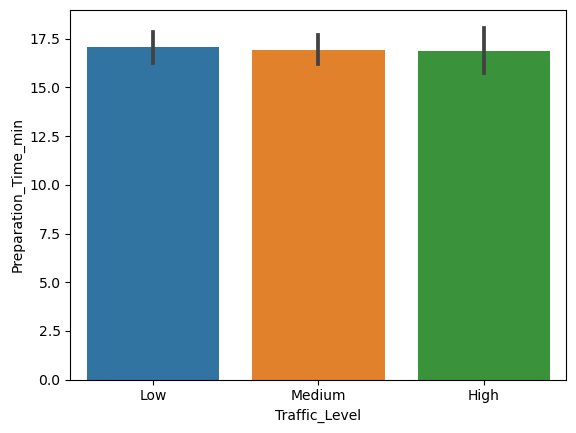

In [61]:
sns.barplot(data=df, x='Traffic_Level', y='Preparation_Time_min', estimator=np.mean)


In [62]:
df.duplicated().sum()

0

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                799 non-null    float64
 1   Distance_km             799 non-null    float64
 2   Weather                 774 non-null    object 
 3   Traffic_Level           774 non-null    object 
 4   Time_of_Day             774 non-null    object 
 5   Vehicle_Type            799 non-null    object 
 6   Preparation_Time_min    799 non-null    float64
 7   Courier_Experience_yrs  0 non-null      float64
 8   Delivery_Time_min       799 non-null    float64
 9   delivery_speed          799 non-null    float64
dtypes: float64(6), object(4)
memory usage: 68.7+ KB


In [64]:
df.nunique()

Order_ID                  799
Distance_km               660
Weather                     5
Traffic_Level               3
Time_of_Day                 4
Vehicle_Type                3
Preparation_Time_min       25
Courier_Experience_yrs      0
Delivery_Time_min         103
delivery_speed            786
dtype: int64

<Axes: xlabel='Weather', ylabel='delivery_speed'>

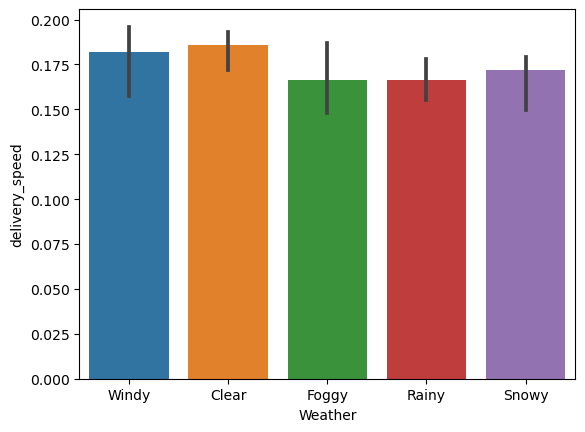

In [65]:
sns.barplot(data=df, x="Weather",y= "delivery_speed", estimator= np.median)

<Axes: xlabel='Weather'>

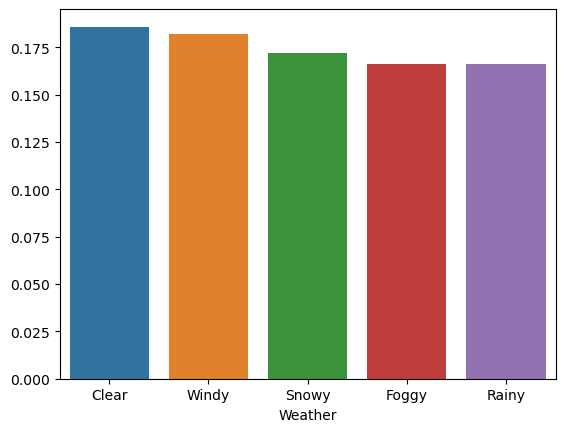

In [66]:
median_value= df.groupby('Weather')["delivery_speed"].median().sort_values(ascending=False)
sns.barplot(x=median_value.index, y=median_value.values)

<Axes: xlabel='Weather'>

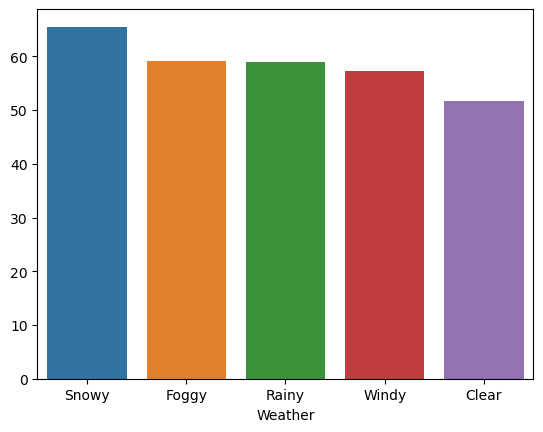

In [67]:
mean_value= df.groupby('Weather')["Delivery_Time_min"].mean().sort_values(ascending=False)
sns.barplot(x=mean_value.index, y=mean_value.values)

<Axes: xlabel='Time_of_Day'>

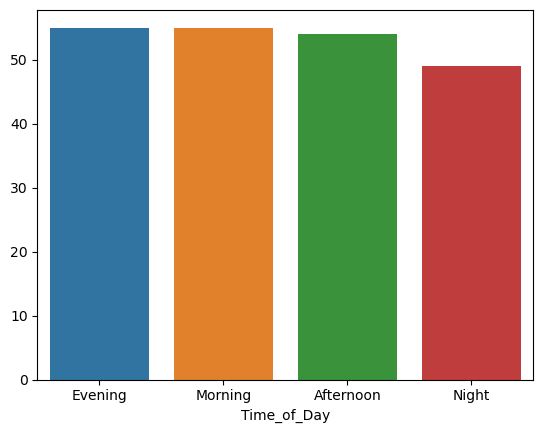

In [68]:
median_value_traf=df.groupby("Time_of_Day")["Delivery_Time_min"].median().sort_values(ascending=False)
sns.barplot(x=median_value_traf.index, y=median_value_traf.values)

<Axes: xlabel='Traffic_Level'>

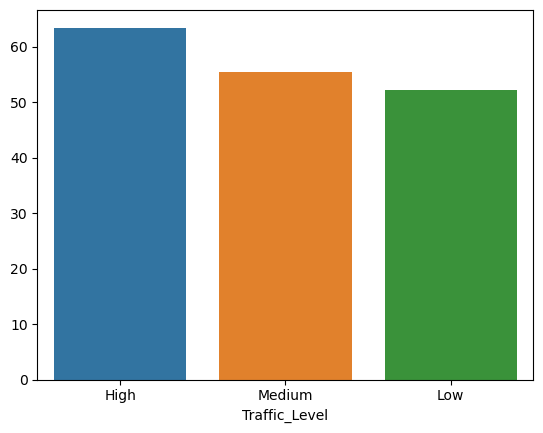

In [69]:
mean_value_traf=df.groupby("Traffic_Level")["Delivery_Time_min"].mean().sort_values(ascending=False)
sns.barplot(x=mean_value_traf.index, y=mean_value_traf.values)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                799 non-null    float64
 1   Distance_km             799 non-null    float64
 2   Weather                 774 non-null    object 
 3   Traffic_Level           774 non-null    object 
 4   Time_of_Day             774 non-null    object 
 5   Vehicle_Type            799 non-null    object 
 6   Preparation_Time_min    799 non-null    float64
 7   Courier_Experience_yrs  0 non-null      float64
 8   Delivery_Time_min       799 non-null    float64
 9   delivery_speed          799 non-null    float64
dtypes: float64(6), object(4)
memory usage: 68.7+ KB


In [71]:
df['Delivery_Time_min'].describe()

count    799.000000
mean      55.789737
std       21.420561
min        8.000000
25%       41.000000
50%       54.000000
75%       70.000000
max      116.000000
Name: Delivery_Time_min, dtype: float64

In [72]:

df['Preparation_Time_min'].describe()

count    799.000000
mean      17.000000
std        7.344034
min        5.000000
25%       10.000000
50%       17.000000
75%       24.000000
max       29.000000
Name: Preparation_Time_min, dtype: float64

<Axes: xlabel='Preparation_Time_min', ylabel='Delivery_Time_min'>

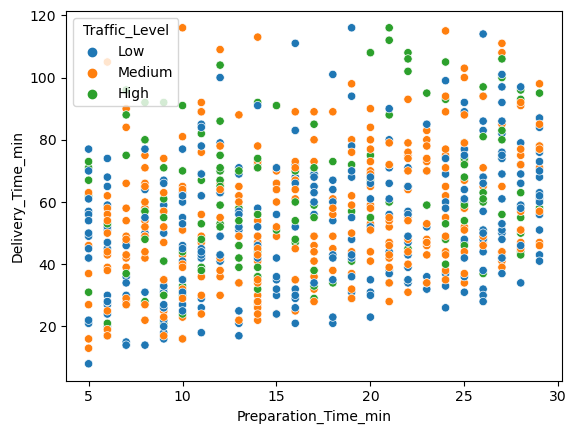

In [73]:
sns.scatterplot(data=df, x='Preparation_Time_min', y='Delivery_Time_min', hue='Traffic_Level')

In [74]:
df1.head(5)

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522.0,7.93,Windy,Low,Afternoon,Scooter,12.0,NaN,43.0
1,738.0,16.42,Clear,Medium,Evening,Bike,20.0,NaN,84.0
2,741.0,9.52,Foggy,Low,Night,Scooter,28.0,NaN,59.0
3,661.0,7.44,Rainy,Medium,Afternoon,Scooter,5.0,NaN,37.0
4,412.0,19.03,Clear,Low,Morning,Bike,16.0,NaN,68.0


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   float64
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   float64
 7   Courier_Experience_yrs  0 non-null      float64
 8   Delivery_Time_min       1000 non-null   float64
dtypes: float64(5), object(4)
memory usage: 70.4+ KB


In [76]:
missing_indices_all = df[df.isna().any(axis=1)].index

In [77]:
missing_data = df[df.isna().any(axis=1)]

In [78]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                799 non-null    float64
 1   Distance_km             799 non-null    float64
 2   Weather                 774 non-null    object 
 3   Traffic_Level           774 non-null    object 
 4   Time_of_Day             774 non-null    object 
 5   Vehicle_Type            799 non-null    object 
 6   Preparation_Time_min    799 non-null    float64
 7   Courier_Experience_yrs  0 non-null      float64
 8   Delivery_Time_min       799 non-null    float64
 9   delivery_speed          799 non-null    float64
dtypes: float64(6), object(4)
memory usage: 68.7+ KB


<Axes: ylabel='delivery_speed'>

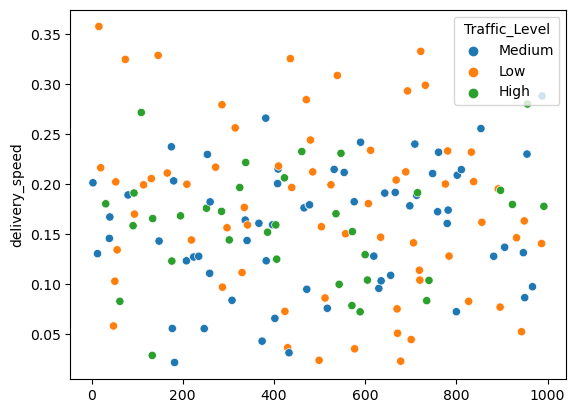

In [79]:
# Filter data where Weather is 'Clear'
filtered_df = df[df['Weather'] == 'Rainy']

# Scatter plot
sns.scatterplot(data=filtered_df, x=filtered_df.index, y='delivery_speed', hue='Traffic_Level')


In [80]:
df["Delivery_Time_min"].describe()

count    799.000000
mean      55.789737
std       21.420561
min        8.000000
25%       41.000000
50%       54.000000
75%       70.000000
max      116.000000
Name: Delivery_Time_min, dtype: float64

In [81]:
from scipy.stats import skew

print("Skewness:", skew(df["Delivery_Time_min"]))

Skewness: 0.3912731385790039


In [82]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,delivery_speed
count,799.000000,799.000000,799.000000,0.0,799.000000,799.000000
mean,500.812265,9.931089,17.000000,NaN,55.789737,0.169490
std,287.398978,5.656852,7.344034,NaN,21.420561,0.071042
min,1.000000,0.600000,5.000000,NaN,8.000000,0.017317
25%,251.500000,4.990000,10.000000,NaN,41.000000,0.120286
50%,501.000000,10.100000,17.000000,NaN,54.000000,0.174902
75%,749.500000,14.780000,24.000000,NaN,70.000000,0.215736
max,999.000000,19.930000,29.000000,NaN,116.000000,0.404375


In [83]:
df=df.drop("delivery_speed", axis=1)

In [84]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.base import BaseEstimator, TransformerMixin

num_pipeline=make_pipeline(SimpleImputer(strategy="median"),
              StandardScaler())
cat_pipeline=make_pipeline(SimpleImputer(strategy="most_frequent"),
                          OneHotEncoder())

preprocessing=ColumnTransformer([
    ("cat", cat_pipeline, make_column_selector(dtype_include="object")),
    ("num", num_pipeline, make_column_selector(dtype_include="number"))])


In [85]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522.0,7.93,Windy,Low,Afternoon,Scooter,12.0,NaN,43.0
1,738.0,16.42,Clear,Medium,Evening,Bike,20.0,NaN,84.0
2,741.0,9.52,Foggy,Low,Night,Scooter,28.0,NaN,59.0
3,661.0,7.44,Rainy,Medium,Afternoon,Scooter,5.0,NaN,37.0
4,412.0,19.03,Clear,Low,Morning,Bike,16.0,NaN,68.0


In [86]:
df11=df.drop("Delivery_Time_min", axis=1)
df_time=df["Delivery_Time_min"]

In [87]:
from sklearn.linear_model import LinearRegression
lin_reg=make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(df11, df_time)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x168f78690>),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x169631450>)])),
                ('linearregression', LinearRegression())])

In [88]:
df_predict=lin_reg.predict(df11)

In [89]:
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(df_predict,df_time)
lin_mse=np.sqrt(mse1)

In [90]:
lin_mse

9.727680962523175

In [91]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=make_pipeline(preprocessing, DecisionTreeRegressor())
tree_reg.fit(df11, df_time)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x168f78690>),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x169631450>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [92]:
tree_pred= tree_reg.predict(df11)

In [93]:
from sklearn.metrics import mean_squared_error
mset=mean_squared_error(tree_pred, df_time)
mset1=np.sqrt(mset)

In [94]:
mset1

0.0

In [95]:
from sklearn.model_selection import cross_val_score
tree_rmse= -cross_val_score(tree_reg, df11, df_time, scoring="neg_root_mean_squared_error", cv=10)

In [96]:
pd.Series(tree_rmse).describe()

count    10.000000
mean     15.089801
std       1.307395
min      12.781018
25%      14.836957
50%      15.128613
75%      15.549392
max      17.170469
dtype: float64

In [97]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=make_pipeline(preprocessing, RandomForestRegressor())
forest_reg.fit(df11, df_time)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x168f78690>),
                                                 ('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x169631450>)])),
                ('randomforestregressor', RandomForestRegressor())])

In [98]:
forest_pr=forest_reg.predict(df11)

In [99]:
msef1=mean_squared_error(df_time, forest_pr)
msef=np.sqrt(msef1)

In [100]:
msef

4.0746581358016485

In [101]:
forest_rmses=-cross_val_score(forest_reg, df11, df_time, scoring="neg_root_mean_squared_error", cv=10)

In [102]:
pd.Series(forest_rmses).describe()

count    10.000000
mean     10.921014
std       1.062279
min       9.169696
25%      10.167400
50%      10.903431
75%      11.733704
max      12.295294
dtype: float64

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([
("preprocessing", preprocessing),
("random_forest", RandomForestRegressor()),
])
param_grid = {
    'random_forest__n_estimators': [50, 100, 200], 
    'random_forest__max_features': [4, 6, 8, 10],
    'random_forest__max_depth': [10, 20, None],  # `None` means unlimited depth
    'random_forest__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(full_pipeline, param_grid, cv=7,
scoring='neg_root_mean_squared_error')
grid_search.fit(df11, df_time)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x168f78690>),
                                                                        ('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strateg...
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x169631450>)])),
                                       ('random_forest',
                                        RandomForestRegressor())]),
             param_grid={'random_forest__max_depth': [10, 20, None],
                         'random_forest__max_features': [4, 6, 8, 10],
                         'random_forest__min_samples_split': [2, 5, 10],
                         'random_forest__n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error')

In [104]:
final_model=grid_search.best_estimator_

In [105]:
feature_importance= final_model["random_forest"].feature_importances_
feature_importance.round(2)

array([0.02, 0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.  , 0.01, 0.01, 0.01, 0.06, 0.66, 0.14])

In [106]:
test_set

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
9,137.0,10.62,Foggy,Low,Evening,Scooter,29.0,NaN,73.0
21,175.0,13.08,Rainy,Low,Morning,Car,16.0,NaN,58.0
27,987.0,13.92,Snowy,Low,Morning,Scooter,18.0,NaN,70.0
28,903.0,4.04,Snowy,Low,Night,Bike,11.0,NaN,70.0
29,948.0,18.05,Clear,Medium,Evening,Scooter,10.0,NaN,116.0
...,...,...,...,...,...,...,...,...,...
981,664.0,5.13,Clear,Medium,Morning,Car,16.0,NaN,38.0
983,100.0,2.60,Clear,Low,Afternoon,Bike,16.0,NaN,29.0
984,373.0,2.34,Foggy,Medium,Morning,Bike,8.0,NaN,28.0
991,615.0,17.53,Clear,Low,Afternoon,Bike,14.0,NaN,79.0


In [107]:
x_test=test_set.drop("Delivery_Time_min", axis=1)
y_test=test_set["Delivery_Time_min"]
final_predict=final_model.predict(x_test)

In [108]:
final_rmse=mean_squared_error(final_predict, y_test)
final_rmse1=np.sqrt(final_rmse)

In [109]:
final_rmse1

12.622263478607278

In [110]:
from sklearn.metrics import r2_score
final_r2 = r2_score(y_test, final_predict)
final_r2

0.6856577101296681

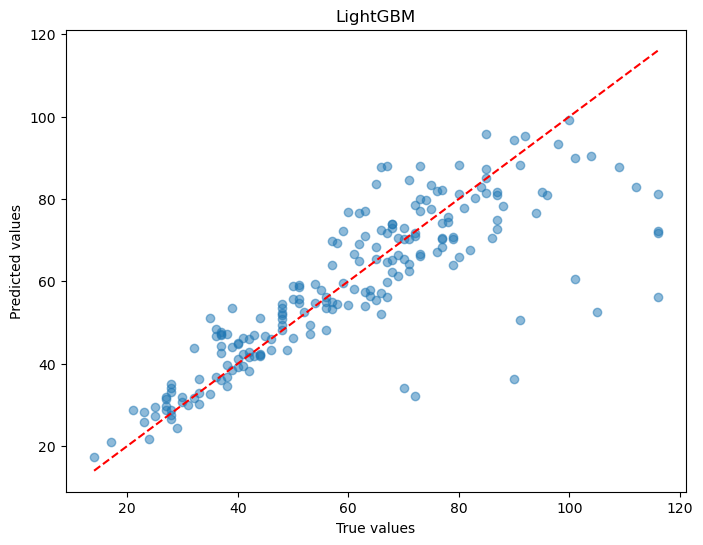

In [111]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_predict, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('LightGBM')
plt.show()

In [113]:
from sklearn.ensemble import VotingRegressor
voting_reg=VotingRegressor(estimators = [
    ('lr', lin_reg),
    ('rf', forest_reg)
])
voting_reg.fit(df11, df_time)

VotingRegressor(estimators=[('lr',
                             Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x168f78690>),
                                                                              ('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImput...
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x168f78690>),
                                                                              ('num',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x169631450>)])),
                                             ('randomforestregressor',
                                              RandomForestRegressor())]))])

In [115]:
vot_t=voting_reg.predict(df11)

In [116]:
from sklearn.metrics import mean_squared_error
mse1v=mean_squared_error(vot_t,df_time)
vot_mse=np.sqrt(mse1v)

In [117]:
vot_mse

6.72780850577385

In [118]:
vpred= voting_reg.predict(x_test)

In [119]:
from sklearn.metrics import r2_score
final_r2v = r2_score(y_test, vpred)
final_r2v

0.7065872267062597

In [120]:
linp=lin_reg.predict(x_test)
final_r2l = r2_score(y_test, linp)
final_r2l

0.7152953916044583

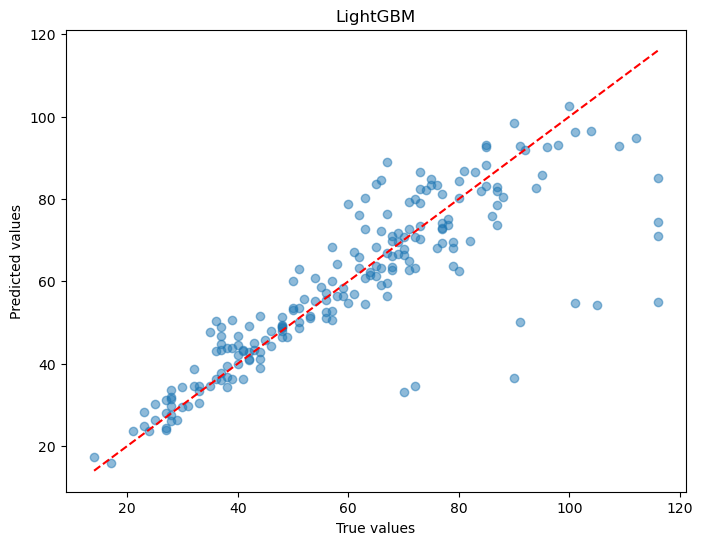

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linp, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('LightGBM')
plt.show()

In [124]:
for name, clf in voting_reg.named_estimators_.items():
    print(name, "=", clf.score(x_test, y_test))

lr = 0.7152953916044583
rf = 0.6771357941737217


In [144]:

from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(tree_reg, n_estimators=500, max_samples=100, n_jobs=-1, random_state=42)
if not isinstance(df11, pd.DataFrame):
    df11 = pd.DataFrame(df11)
bag_clf.fit(df11, df_time)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: make_column_selector can only be applied to pandas dataframes

In [145]:
from sklearn.tree import DecisionTreeRegressor

# Create the correct Bagging model for regression
bagging_reg = BaggingRegressor(
    base_estimator=tree_reg,  # Keep your preprocessing + regressor pipeline
    n_estimators=500,
    max_samples=100,
    n_jobs=-1,
    random_state=42
)

# Fit the model
bagging_reg.fit(df11, df_time)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


ValueError: make_column_selector can only be applied to pandas dataframes